<center><img src="https://github.com/hse-ds/iad-applied-ds/blob/master/2021/hw/hw1/img/logo_hse.png?raw=1" width="1000"></center>

<h1><center>Прикладные задачи анализа данных</center></h1>
<h2><center>Домашнее задание 3: Прогнозирование временных рядов</center></h2>

# Введение

В этом задании Вам предстоит разобраться с основами анализа и прогнозирования временных рядов. 


![image](https://imgs.xkcd.com/comics/extrapolating.png)

In [ ]:
!pip install orbit-ml
!pip install prophet
!pip install sktime[all_extras]

     |████████████████████████████████| 466 kB 5.3 MB/s 
     |████████████████████████████████| 718 kB 17.5 MB/s 
     |████████████████████████████████| 9.8 MB 35.1 MB/s 
     |████████████████████████████████| 11.2 MB 35.5 MB/s 
     |████████████████████████████████| 900 kB 38.9 MB/s 
     |████████████████████████████████| 750.6 MB 12 kB/s 
  Attempting uninstall: torch
    Found existing installation: torch 1.10.0+cu111
    Uninstalling torch-1.10.0+cu111:
      Successfully uninstalled torch-1.10.0+cu111
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of t

     |████████████████████████████████| 65 kB 2.5 MB/s 
     |████████████████████████████████| 49 kB 5.8 MB/s 
     |████████████████████████████████| 45 kB 2.5 MB/s 
  Created wheel for prophet: filename=prophet-1.0.1-py3-none-any.whl size=6639517 sha256=1aa3b9f3cb8a42d45062029747d538d7454900d0c6545e6e9a4e71f60c10b87f
  Stored in directory: /root/.cache/pip/wheels/4e/a0/1a/02c9ec9e3e9de6bdbb3d769d11992a6926889d71567d6b9b67
Successfully built prophet
  Attempting uninstall: cmdstanpy
    Found existing installation: cmdstanpy 0.9.5
    Uninstalling cmdstanpy-0.9.5:
      Successfully uninstalled cmdstanpy-0.9.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
fbprophet 0.7.1 requires cmdstanpy==0.9.5, but you have cmdstanpy 0.9.68 which is incompatible.
     |████████████████████████████████| 6.6 MB 5.0 MB/s 
     |████████████████████████████████| 3.3 MB 39.8 

In [ ]:
%matplotlib inline

from IPython import display
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np


## Задание 1 (1 балл). Поиск и предобработка данных.

В этом задании Вам необходимо _самостоятельно_ найти два временных ряда: один должен обладать месячной частотой, а второй — дневной.

Мы советуем поискать соответствующие временные ряды на платформе [kaggle](https://www.kaggle.com/datasets) или же взять один из [популярных](https://medium.com/analytics-vidhya/10-time-series-datasets-for-practice-d14fec9f21bc) временных рядов для анализа. 

**Не рекомендуется** использовать в качестве временных рядов цены финансовых инструментов в силу плохой предсказуемости изменения цен. **Запрещается** использовать готовые наборы данных из библиотек для анализа временных рядов, например, `from orbit.utils.dataset import load_iclaims`.

![bitcoin](https://avatars.mds.yandex.net/get-zen_doc/3417386/pub_6017dd4b8d30cb1780864ae0_6017f4aa8d30cb1780bf66ce/scale_1200)




В качестве отчета по заданию:

* Опишите источники временных рядов (ссылки на страницы скачивания). В случае, если данные требовали дополнительной обработки, приведите код этой обработки, загрузите данные в личное облачное хранилище и приведите ссылку на скачивание. Процесс получения временных рядов должен быть **четко** расписан и полностью **воспроизводиться**. 

* Приведите код считывания временных рядов из файлов и разделения на train/test. Соотношение размеров train/test на Ваше усмотрение, но мы советуем Вам выбрать 80% на 20%, если в test остаётся хотя бы пара лет наблюдений.



In [1]:
# скачаем данные
!wget https://drive.google.com/drive/folders/1rq0vrBuD0oCbgVkgnafn0RE6mKEcmv4_?usp=sharing

--2022-04-24 11:22:04--  https://drive.google.com/drive/folders/1rq0vrBuD0oCbgVkgnafn0RE6mKEcmv4_?usp=sharing
Resolving drive.google.com (drive.google.com)... 142.251.6.102, 142.251.6.113, 142.251.6.138, ...
Connecting to drive.google.com (drive.google.com)|142.251.6.102|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘1rq0vrBuD0oCbgVkgnafn0RE6mKEcmv4_?usp=sharing’

1rq0vrBuD0oCbgVkgna     [  <=>               ] 209.63K   213KB/s    in 1.0s    

2022-04-24 11:22:05 (213 KB/s) - ‘1rq0vrBuD0oCbgVkgnafn0RE6mKEcmv4_?usp=sharing’ saved [214664]



Не получилось скачать через wget, поэтому прикрепляю ссылку на гугл диск с файлами и источниками

Файлы: https://drive.google.com/drive/folders/1rq0vrBuD0oCbgVkgnafn0RE6mKEcmv4_?usp=sharing

ИПЦ: https://rosstat.gov.ru/price

Рождаемость: https://www.kaggle.com/datasets/dougcresswell/daily-total-female-births-in-california-1959?resource=download

In [ ]:
# считаем файлы
ts1 = pd.read_excel('ИПЦ.xlsx')
ts2 = pd.read_csv('daily-total-female-births-CA.csv')

In [ ]:
ts1['Unnamed: 0'] = pd.PeriodIndex(pd.date_range(ts1['Unnamed: 0'][0], 
                                                    periods=len(ts1), 
                                                    freq="M"))

In [ ]:
ts2['date'] = pd.PeriodIndex(pd.date_range(ts2['date'][0], 
                                                    periods=len(ts2), 
                                                    freq="D"))

In [ ]:
ts1 = ts1.set_index('Unnamed: 0')
ts2 = ts2.set_index('date')

In [ ]:
# сделаем разбиение на train/test
from sklearn.model_selection import train_test_split
ts1_train, ts1_test = train_test_split(ts1, test_size=0.2, shuffle = False)
ts2_train, ts2_test = train_test_split(ts2, test_size=0.2, shuffle = False)

## Задание 2. Анализ временных рядов (1 балл).

* Отрисуйте временные ряды и визуально сделайте различимым разбиение на выборки — либо вертикальной чертой, либо разными цветами.

* Постройте графики [автокорреляционных функций](https://www.machinelearningmastery.ru/time-series-in-python-exponential-smoothing-and-arima-processes-2c67f2a52788/) для выбранных временных рядов. Прокомментируйте их: являются ли временные ряды сезонными? Видна ли на графиках длина сезонной составляющей ряда?

* В случае присутствия сезонности, разбейте временной ряд на повторяющиеся фрагменты и нарисуйте их наложенными для иллюстрации этой сезонности.

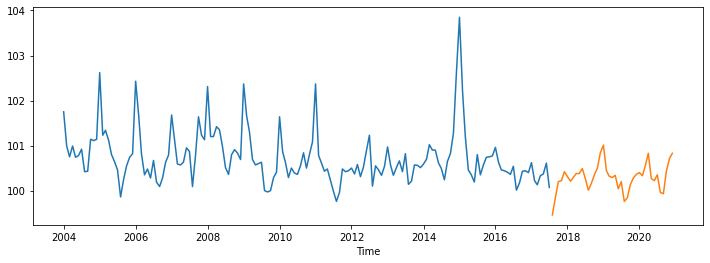

In [ ]:
# отрисуем временные ряды
plt.figure(figsize=(12, 4))
plt.plot(ts1_train)
plt.plot(ts1_test)
plt.xlabel('Time')
plt.show()

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


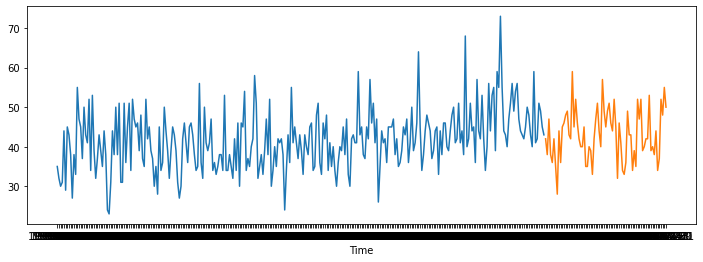

In [ ]:
# отрисуем временные ряды
plt.figure(figsize=(12, 4))
plt.plot(ts2_train)
plt.plot(ts2_test)
plt.xlabel('Time')
plt.show()

<AxesSubplot:>

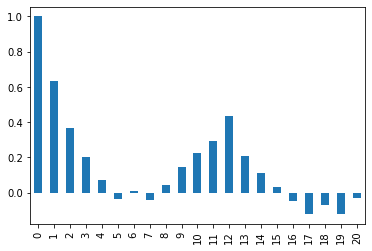

In [ ]:
# посчитайте и нарисуйте график автокорреляционной функции
# hint, используйте для этого np.correlate(..., mode='full')
from statsmodels.tsa.stattools import acf, pacf
lag_acf1 = acf(ts1, nlags=20)
lag_acf2 = acf(ts2, nlags=40)

ACF1 = pd.Series(lag_acf1)
ACF2 = pd.Series(lag_acf2)

ACF1.plot(kind = "bar")


<AxesSubplot:>

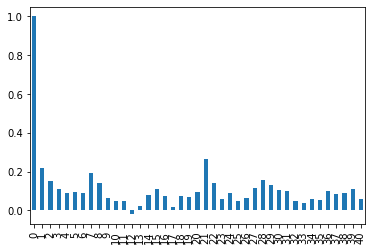

In [ ]:
ACF2.plot(kind = "bar")

По графикам автокорреляции можно заметить, что для датасета с месячными данными ИПЦ сезонность составляет 12 месяцев (в течение года цена ведет себя примерно одинаково), а для ежедневных данных по рождаемости сильно выраженной сезоннности нет, но можно заметить повторяющиеся пики автокорреляции с периодичностью где-то 6-7 дней (одна неделя)

CЕЗОННОСТЬ ДЛЯ ИПЦ:

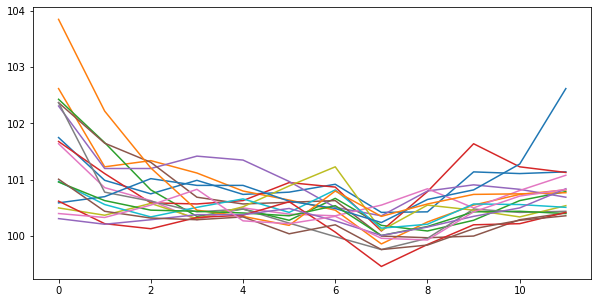

In [ ]:
plt.figure(figsize=(10, 5))
for i in range(0,len(ts1),12):
  x = pd.DataFrame(ts1['ИПЦ'][i:i+12])
  x.set_index(np.arange(12),inplace=True)
  plt.plot(x)


В целом данные ведут себя каждый год по похожему сценарию и можно говорить о годичной сезонности

СЕЗОННОСТЬ ДЛЯ РОЖДАЕМОСТИ:

ValueError: ignored

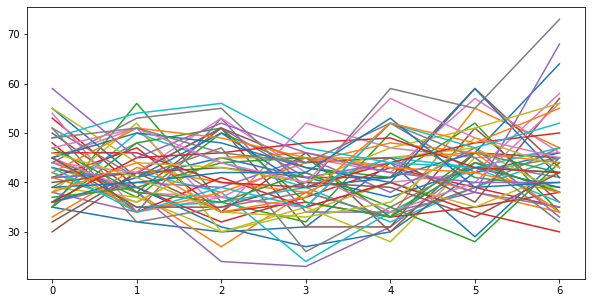

In [ ]:
plt.figure(figsize=(10, 5))
for i in range(0,len(ts2),7):
  x = pd.DataFrame(ts2['births'][i:i+7])
  x.set_index(np.arange(7),inplace=True)
  plt.plot(x)


В ежедневных данных сезонность на графике практически незаметна, тем не менее, опираясь на данные автокорреляции, возьмем сезонность за одну неделю

## Задание 3. Предсказание месячного временного ряда (4 балла).

В этом задании Вам предстоит попробовать предсказать месячный временной ряд несколькими готовыми моделями со скользящим или растущим окном и выбрать среди них наилучшую.

В качестве метрики сравнения используйте MAE между истинными и предсказанными значениями ряда на тестовом отрезке.

### NaiveForecaster из sktime (1 балл).

Посчитайте предсказания следующими двумя наивными способами:

* $\hat{y}_{t+1} = y_{t}$
* $\hat{y}_{t+1} = y_{t-seasonality+1}$

In [ ]:
from sktime.forecasting.naive import NaiveForecaster

# ваш код обучения моделей здесь
forecaster_naive = NaiveForecaster(strategy="last")
forecaster_naive.fit(ts1_train)
forecaster_ses_naive = NaiveForecaster(strategy="last", sp=12)
forecaster_ses_naive.fit(ts1_train)

NaiveForecaster(sp=12)

In [ ]:
from sktime.forecasting.base import ForecastingHorizon
fh = ForecastingHorizon(
    ts1_test.index, 
                        is_relative=False
                        )
fh

ForecastingHorizon(['2017-08', '2017-09', '2017-10', '2017-11', '2017-12', '2018-01',
             '2018-02', '2018-03', '2018-04', '2018-05', '2018-06', '2018-07',
             '2018-08', '2018-09', '2018-10', '2018-11', '2018-12', '2019-01',
             '2019-02', '2019-03', '2019-04', '2019-05', '2019-06', '2019-07',
             '2019-08', '2019-09', '2019-10', '2019-11', '2019-12', '2020-01',
             '2020-02', '2020-03', '2020-04', '2020-05', '2020-06', '2020-07',
             '2020-08', '2020-09', '2020-10', '2020-11', '2020-12'],
            dtype='period[M]', name='Unnamed: 0', is_relative=False)

In [ ]:
ts1_naive_pred = forecaster_naive.predict(fh)
ts1_ses_naive_pred = forecaster_ses_naive.predict(fh)

In [ ]:
ts1_naive_pred.rename(columns={0:"ИПЦ"}, inplace=True) 

In [ ]:
ts1_ses_naive_pred.rename(columns={0:"ИПЦ"}, inplace=True) 

In [ ]:
# посчитайте метрики на test

def RMSE(predicted, actual):
    mse = (predicted - actual)**2
    rmse = np.sqrt(mse.sum()/mse.count())
    return rmse
model_naive_RMSE = RMSE(ts1_naive_pred, ts1_test)
model_naive_RMSE_season = RMSE(ts1_ses_naive_pred, ts1_test)
print("Naive: ", model_naive_RMSE,"\n", "Ses Naive: ", model_naive_RMSE_season)

Naive:  ИПЦ    0.374859
dtype: float64 
 Ses Naive:  ИПЦ    0.261511
dtype: float64


### ARIMA/AutoArima (1 балл).

Обучите из библиотеки `sktime` модели:

* SARIMA(1, 1, 1)(1, 0, 0)[12] (`ARIMA` в `sktime`)
* Алгоритм Хиндмана-Хандакара подбора SARIMA (`AutoARIMA` в `sktime`)

In [ ]:
from sktime.forecasting.arima import ARIMA, AutoARIMA

# ваш код обучения моделей здесь
forecaster = ARIMA(
    order=(1, 1, 1),
    seasonal_order=(1, 0, 0, 12))
forecaster.fit(ts1_train)

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


ARIMA(order=(1, 1, 1), seasonal_order=(1, 0, 0, 12))

In [ ]:
ts1_test.index

PeriodIndex(['2017-08', '2017-09', '2017-10', '2017-11', '2017-12', '2018-01',
             '2018-02', '2018-03', '2018-04', '2018-05', '2018-06', '2018-07',
             '2018-08', '2018-09', '2018-10', '2018-11', '2018-12', '2019-01',
             '2019-02', '2019-03', '2019-04', '2019-05', '2019-06', '2019-07',
             '2019-08', '2019-09', '2019-10', '2019-11', '2019-12', '2020-01',
             '2020-02', '2020-03', '2020-04', '2020-05', '2020-06', '2020-07',
             '2020-08', '2020-09', '2020-10', '2020-11', '2020-12'],
            dtype='period[M]', name='Unnamed: 0')

In [ ]:
from sktime.forecasting.base import ForecastingHorizon
fh = ForecastingHorizon(
    ts1_test.index, 
                        is_relative=False
                        )
fh

ForecastingHorizon(['2017-08', '2017-09', '2017-10', '2017-11', '2017-12', '2018-01',
             '2018-02', '2018-03', '2018-04', '2018-05', '2018-06', '2018-07',
             '2018-08', '2018-09', '2018-10', '2018-11', '2018-12', '2019-01',
             '2019-02', '2019-03', '2019-04', '2019-05', '2019-06', '2019-07',
             '2019-08', '2019-09', '2019-10', '2019-11', '2019-12', '2020-01',
             '2020-02', '2020-03', '2020-04', '2020-05', '2020-06', '2020-07',
             '2020-08', '2020-09', '2020-10', '2020-11', '2020-12'],
            dtype='period[M]', name='Unnamed: 0', is_relative=False)

In [ ]:
forecaster_auto = AutoARIMA()
forecaster_auto.fit(ts1_train)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


AutoARIMA()

In [ ]:
# посчитайте метрики на test
ts1_arima_pred = forecaster.predict(fh)
ts1_arima_pred_auto = forecaster_auto.predict(fh)

In [ ]:
def RMSE(predicted, actual):
    mse = (predicted - actual)**2
    rmse = np.sqrt(mse.sum()/mse.count())
    return rmse
model_arima_RMSE = RMSE(ts1_arima_pred, ts1_test)
model_arima_RMSE_auto = RMSE(ts1_arima_pred_auto, ts1_test)
print("Arima: ", model_arima_RMSE,"\n", "AutoArima: ", model_arima_RMSE_auto)

Arima:  ИПЦ    0.256385
dtype: float64 
 AutoArima:  ИПЦ    0.499233
dtype: float64


### LGT/DLT (1 балл).

Обучите из библиотеки `orbit` модели LGT и DLT

In [ ]:
#from orbit.models.lgt import LGTFull
#from orbit.models.dlt import DLTFull
from orbit.models import LGT
from orbit.models import DLT
# ваш код обучения моделей здесь


In [ ]:
lgt = LGT(
    response_col='ИПЦ',
    date_col='Unnamed: 0',
    seasonality=12,
    seed=8888,
)

In [ ]:
dlt = DLT(
    response_col='ИПЦ',
    date_col='Unnamed: 0',
    seasonality=12,
    seed=8888,
    global_trend_option='linear',
)

In [ ]:
lgt.fit(ts1_train)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_d372bb7bc77e1df83218127fc9dd707d NOW.


In [ ]:
dlt.fit(ts1_train)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_05ff738ef22ce2e8a332ce639cee65cf NOW.


In [ ]:
# посчитайте метрики на test
ts1_lgt_pred = lgt.predict(ts1_test)

In [ ]:
ts1_dlt_pred = dlt.predict(ts1_test)

In [ ]:
def RMSE(predicted, actual):
    mse = (predicted - actual)**2
    rmse = np.sqrt(mse.sum()/mse.count())
    return rmse
model_lgt_RMSE = RMSE(pd.DataFrame(ts1_lgt_pred['prediction']).rename(columns={'prediction':'ИПЦ'}), 
                      pd.DataFrame(ts1_test['ИПЦ']).set_index(np.arange(0,len(ts1_lgt_pred))))
model_dlt_RMSE = RMSE(pd.DataFrame(ts1_dlt_pred['prediction']).rename(columns={'prediction':'ИПЦ'}), 
                      pd.DataFrame(ts1_test['ИПЦ']).set_index(np.arange(0,len(ts1_dlt_pred))))
print("LGT: ", model_lgt_RMSE,"\n", "DLT: ", model_dlt_RMSE)

LGT:  ИПЦ    0.276783
dtype: float64 
 DLT:  ИПЦ    0.31476
dtype: float64


### ETS (1 балл).

Обучите из библиотеки `sktime` модели:

* ETS(AAA) (`ExponentialSmoothing` в `sktime`)
* ETS с автоматическим выбором по AIC (`AutoETS` в `sktime`)

In [ ]:
from sktime.forecasting.exp_smoothing import ExponentialSmoothing
from sktime.forecasting.ets import AutoETS

# ваш код обучения моделей здесь
forecaster_ETS = ExponentialSmoothing()
forecaster_ETS.fit(ts1_train)

forecaster_ETS_auto = AutoETS()
forecaster_ETS_auto.fit(ts1_train)

AutoETS()

In [ ]:
ts1_ETS_pred = forecaster_ETS.predict(fh)
ts1_ETS_pred_auto = forecaster_ETS_auto.predict(fh)

In [ ]:
# посчитайте метрики на test
model_ETS_RMSE = RMSE(ts1_ETS_pred, ts1_test)
model_ETS_RMSE_auto = RMSE(ts1_ETS_pred_auto, ts1_test)
print("ETS: ", model_ETS_RMSE,"\n", "Auto ETS: ", model_ETS_RMSE_auto)

ETS:  ИПЦ    0.325058
dtype: float64 
 Auto ETS:  ИПЦ    0.325058
dtype: float64


Нарисуйте для наилучшей модели предсказания с доверительным интервалом (если модель выдает его) и наложите их на истинные значения. В `sktime` `ETS` модель пока ещё не выдаёт доверительные интервалы, но при желании до них можно дотянуться :)

В итоге лучшей оказалась **ARIMA** с RMSE=0.256, построим график для нее

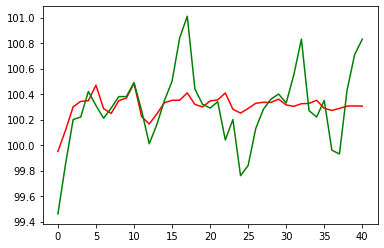

In [ ]:
plt.plot(pd.DataFrame(ts1_arima_pred['ИПЦ']).set_index(np.arange(0, len(ts1_arima_pred))), c='r')
plt.plot(pd.DataFrame(ts1_test['ИПЦ']).set_index(np.arange(0, len(ts1_test))), c='g')


Арима модель не могла предсказать острые пики и впадины, но тем не менее оказалась лучшей, из всех исследуемых моделей для месячных промежутков

## Задание 4. Предсказание дневного временного ряда (3 балла).

В этом задании Вам предстоит попробовать предсказать выбранный Вами дневной временной ряд.

Аналогично, в качестве метрики используем MAE.



### NaiveForecaster из sktime (1 балл).

Посчитайте предсказания следующими двумя наивными способами:

* $\hat{y}_{t+1} = y_{t}$
* $\hat{y}_{t+1} = y_{t-seasonality+1}$

In [ ]:
from sktime.forecasting.naive import NaiveForecaster


# ваш код обучения моделей здесь
forecaster_naive = NaiveForecaster(strategy="last")
forecaster_naive.fit(ts2_train)
forecaster_ses_naive = NaiveForecaster(strategy="last", sp=6)
forecaster_ses_naive.fit(ts2_train)

NaiveForecaster(sp=3)

In [ ]:
from sktime.forecasting.base import ForecastingHorizon
fh = ForecastingHorizon(
    ts2_test.index, 
                        is_relative=False
                        )
fh

ForecastingHorizon(['1959-10-20', '1959-10-21', '1959-10-22', '1959-10-23',
             '1959-10-24', '1959-10-25', '1959-10-26', '1959-10-27',
             '1959-10-28', '1959-10-29', '1959-10-30', '1959-10-31',
             '1959-11-01', '1959-11-02', '1959-11-03', '1959-11-04',
             '1959-11-05', '1959-11-06', '1959-11-07', '1959-11-08',
             '1959-11-09', '1959-11-10', '1959-11-11', '1959-11-12',
             '1959-11-13', '1959-11-14', '1959-11-15', '1959-11-16',
             '1959-11-17', '1959-11-18', '1959-11-19', '1959-11-20',
             '1959-11-21', '1959-11-22', '1959-11-23', '1959-11-24',
             '1959-11-25', '1959-11-26', '1959-11-27', '1959-11-28',
             '1959-11-29', '1959-11-30', '1959-12-01', '1959-12-02',
             '1959-12-03', '1959-12-04', '1959-12-05', '1959-12-06',
             '1959-12-07', '1959-12-08', '1959-12-09', '1959-12-10',
             '1959-12-11', '1959-12-12', '1959-12-13', '1959-12-14',
             '1959-12-15', 

In [ ]:
# посчитайте метрики на test
ts2_naive_pred = forecaster_naive.predict(fh)
ts2_ses_naive_pred = forecaster_ses_naive.predict(fh)

In [ ]:
ts2_naive_pred.rename(columns={0:"births"}, inplace=True) 
ts2_ses_naive_pred.rename(columns={0:"births"}, inplace=True) 

In [ ]:
def RMSE(predicted, actual):
    mse = (predicted - actual)**2
    rmse = np.sqrt(mse.sum()/mse.count())
    return rmse
model_naive_RMSE = RMSE(ts2_naive_pred, ts2_test)
model_naive_RMSE_season = RMSE(ts2_ses_naive_pred, ts2_test)
print("Naive: ", model_naive_RMSE,"\n", "Ses Naive: ", model_naive_RMSE_season)

Naive:  births    6.423416
dtype: float64 
 Ses Naive:  births    7.595961
dtype: float64


### KTR из orbit (1 балл).



In [ ]:
#from orbit.models.ktrlite import KTRLiteMAP
from orbit.models import KTR
# ваш код обучения моделей здесь
forecaster = KTR(
                        response_col='births',
                        date_col='date',
                        seasonality=7
                        )

forecaster.fit(ts2_train)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_ce583eb84b35032d795f7056cd3c761e NOW.
INFO:root:Guessed max_plate_nesting = 1


In [ ]:
ts2_ktr_pred = forecaster.predict(ts2_test)

In [ ]:
# посчитайте метрики на test
def RMSE(predicted, actual):
    mse = (predicted - actual)**2
    rmse = np.sqrt(mse.sum()/mse.count())
    return rmse
model_ktr_RMSE = RMSE(pd.DataFrame(ts2_ktr_pred['prediction']).rename(columns={'prediction':'births'}), 
                      pd.DataFrame(ts2_test['births']).set_index(np.arange(0,len(ts2_ktr_pred))))
print("KTR: ", model_ktr_RMSE)

KTR:  births    6.836526
dtype: float64


### Phophet (1 балл).



In [ ]:
from prophet import Prophet

# ваш код обучения моделей здесь
m = Prophet()
ts2_train['ds'] = ts2_train.index.to_timestamp()
ts2_train['y'] = ts2_train['births'] 
m.fit(ts2_train)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
future = m.make_future_dataframe(periods=len(ts2_test))

In [ ]:
forecast = m.predict(future)

In [ ]:
ts2_prophet_predict = forecast[['ds', 'yhat']]

In [ ]:
ts2_prophet_predict = ts2_prophet_predict.set_index('ds')

In [ ]:
ts2_prophet_predict = ts2_prophet_predict['1959-10-20':]

In [ ]:
ts2_prophet_predict.rename(columns={"yhat":'births'}, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
ts2_prophet_predict = ts2_prophet_predict.set_index(ts2_test.index)

In [ ]:
# посчитайте метрики на test
def RMSE(predicted, actual):
    mse = (predicted - actual)**2
    rmse = np.sqrt(mse.sum()/mse.count())
    return rmse
model_prophet_RMSE = RMSE(ts2_prophet_predict, ts2_test)
print("Prophet: ", model_prophet_RMSE)

Prophet:  births    9.525808
dtype: float64


Нарисуйте для наилучшей модели предсказания с доверительным интервалом (если модель выдает его) и наложите их на истинные значения.

Лучшей оказалась, как ни странно, **наивная модель** с RMSE=6.42

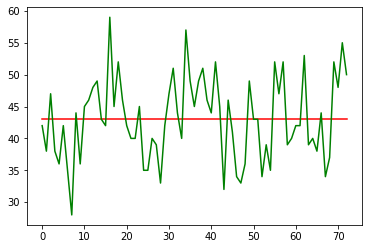

In [ ]:
plt.plot(pd.DataFrame(ts2_naive_pred['births']).set_index(np.arange(0, len(ts2_naive_pred))), c='r')
plt.plot(pd.DataFrame(ts2_test['births']).set_index(np.arange(0, len(ts2_test))), c='g')

Очень странный результат, но из-за сложности предсказания ежедневных данных лучший результат - у наивной модели

## Задание 5. Предсказание временного ряда моделями машинного обучения (1 балл).

Возьмите один из ваших рядов, сформируйте по нему матрицу объект-признак и целевой вектор.

Разбейте данные на train/test в той же пропорции, что разбивали в заданиях выше.

Обучите различные классические модели машинного обучения и оцените их качество (MAE). 

Какая из моделей справилась с задачей предсказания лучше всего?

In [ ]:
# обучите классические модели ML

## Бонус. Напишите свою модель на STAN (3 балла).

Разработайте и испытайте свою модель для месячного ряда в STAN.

Сравните качество прогнозов с наивной сезонной моделью на тестовой выборке с помощью MAE. 

Комментарий: итоговый балл за домашнее задание ставится по формуле минимум(10, ваш суммарный балл за задания).

In [ ]:
# ваш код модели на STAN и её обучения здесь

In [ ]:
# посчитайте метрики на test

In [ ]:
# нарисуйте предсказания